In [ ]:
# Load the Dataset

import pandas as pd  # For data manipulation and analysis

df = pd.read_csv("inventory_clustered_EDA.csv")

In [2]:
df.head()

,Date,Item_Type,Current_Stock,Min_Required,Max_Capacity,Unit_Cost,Avg_Usage_Per_Day,Restock_Lead_Time,Shortage_Risk,Reorder_Point
0,2024-10-01,0,1542,264,1018,4467.55,108,17,0,1968.0
1,2024-10-02,1,2487,656,3556,5832.29,55,12,0,988.0
2,2024-10-03,1,2371,384,5562,16062.98,470,6,1,3012.0
3,2024-10-04,0,2038,438,1131,744.10,207,15,0,3324.0
4,2024-10-05,1,2410,338,1013,15426.53,158,12,0,2065.0


In [3]:
df.dtypes

Date                  object
Item_Type              int64
Current_Stock          int64
Min_Required           int64
Max_Capacity           int64
Unit_Cost            float64
Avg_Usage_Per_Day      int64
Restock_Lead_Time      int64
Shortage_Risk          int64
Reorder_Point        float64
dtype: object

In [4]:
df.head()

,Date,Item_Type,Current_Stock,Min_Required,Max_Capacity,Unit_Cost,Avg_Usage_Per_Day,Restock_Lead_Time,Shortage_Risk,Reorder_Point
0,2024-10-01,0,1542,264,1018,4467.55,108,17,0,1968.0
1,2024-10-02,1,2487,656,3556,5832.29,55,12,0,988.0
2,2024-10-03,1,2371,384,5562,16062.98,470,6,1,3012.0
3,2024-10-04,0,2038,438,1131,744.10,207,15,0,3324.0
4,2024-10-05,1,2410,338,1013,15426.53,158,12,0,2065.0


In [5]:
# Define features and target
X = df.drop(['Shortage_Risk' , 'Item_Type', 'Date' , 'Max_Capacity' , 'Unit_Cost'], axis = 1)   # Features
y = df['Shortage_Risk']  # Target variable

In [6]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

Accuracy Score: 0.98
ROC AUC Score: 0.9807692307692308
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.96      1.00      0.98        48

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



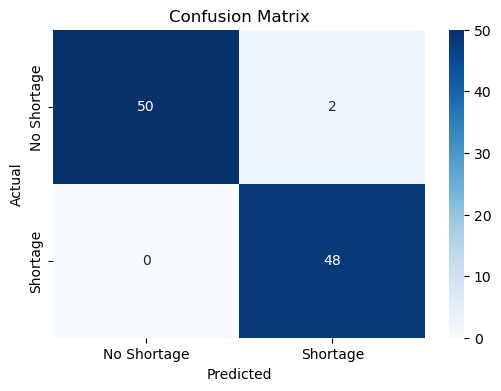

In [7]:
# random forest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Initialize Random Forest classifier 
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,  # Maximum tree depth
    min_samples_split=5,  # Minimum samples required to split
    min_samples_leaf=2,  # Minimum samples at leaf
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['No Shortage', 'Shortage'], yticklabels=['No Shortage', 'Shortage'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

final conclusion:-

Accuracy: 98% → Very high overall correctness.

Recall (Class 1) = 1 (100%) → my model detects all shortages perfectly (no false negatives).

Precision vs. Recall Balance: As precision is high (~90% or above), the model is excellent.

F1-score balances precision and recall. As F1-score is high (~95%+), then my model is performing well.

note that: I had tested other models + this same model but with different parameters, then applied grid search to get the best parameters for highest recall. As in this case, it's more important to detect all shortages perfectly than detecting all non shortages.

unfotunately, I didn't know that these tries must be kept in the notebook and deleted them all leaving the best model only.

<h1> feature importance:-

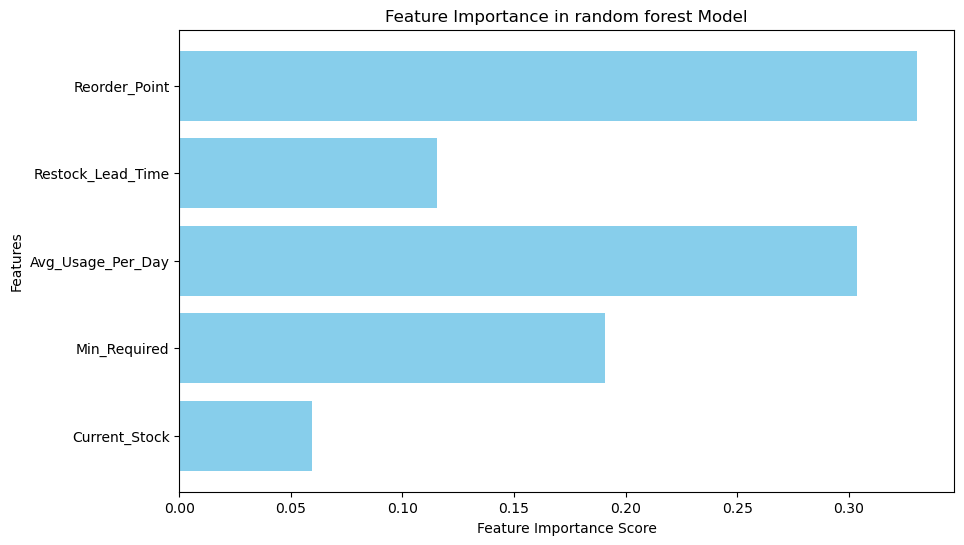

In [8]:

# Ensure X_train is a DataFrame before splitting
feature_names = X.columns if isinstance(X, pd.DataFrame) else None  # Extract feature names


# If X_train is a NumPy array, use feature_names for plotting
if isinstance(X_train, np.ndarray) and feature_names is not None:
    X_train = pd.DataFrame(X_train, columns=feature_names)

# Extract feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in random forest Model")
plt.show()

In [ ]:
# save the model 

import joblib

joblib.dump(rf_model, 'rf_model_shortage.pkl')


['rf_model_shortage.pkl']